In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [39]:
mpl.rcParams['figure.figsize']=(12,8)
markers = ['o', '^', 'v', 'x', 's', 'o']

In [40]:
hc_e = 1.98644586e-25/1.602176634e-19

def load(i):
    s = pd.read_csv(f'./lolik_and_bobik/seria_{i}.txt', delimiter=' ', header=None)
    s.columns = ['l', 'dl']
    s['E'] = hc_e/s.l*1e10
    s['dE'] = s.E*s.dl/s.l
    
    s['delta_E'] = list(s.E.iloc[1:].values - s.E.iloc[:-1].values) + [np.nan]
    s['dDelta_E'] = np.sqrt(s.dE.shift(-1)**2 + s.dE**2)

    
    s.reset_index(inplace=True)
    s.columns= ['n'] + list(s.columns[1:])
    return s

In [41]:
series = list(map(load, range(1,6)))
series[3]

,n,l,dl,E,dE,delta_E,dDelta_E
0,0,6256.784711,0.701935,1.981596,0.000222,0.014289,0.000243
1,1,6211.992464,0.307097,1.995885,0.000099,0.013938,0.000131
2,2,6168.911184,0.263226,2.009823,0.000086,0.013743,0.000156
3,3,6127.014420,0.394839,2.023566,0.000130,NaN,NaN


In [42]:
df = pd.DataFrame()
for i, s in enumerate(series):
    d = s.copy()
    d.loc[:, "series"] = [i+1]*d.shape[0]
    df = pd.concat((df, d))

df.reset_index(drop=True, inplace=True)


In [43]:
print(
df.style.hide(axis=0).format(formatter={
    "series": "{:.0f}",
    "n": "{:.0f}",
    "l": "{:.1f}",
    "dl": "{:.1f}",
    "E": "{:.3f}",
    "dE": "{:.2e}",
}).to_latex(caption="Результаты измерений серий", hrules=True, position='h!')
)

\begin{table}[h!]
\caption{Результаты измерений серий}
\begin{tabular}{rrrrrrrr}
\toprule
n & l & dl & E & dE & delta_E & dDelta_E & series \\
\midrule
0 & 5785.9 & 0.6 & 2.143 & 2.28e-04 & 0.012384 & 0.000324 & 1 \\
1 & 5752.7 & 0.6 & 2.155 & 2.31e-04 & 0.012295 & 0.000328 & 1 \\
2 & 5720.0 & 0.6 & 2.168 & 2.33e-04 & 0.012200 & 0.000332 & 1 \\
3 & 5688.0 & 0.6 & 2.180 & 2.36e-04 & 0.011622 & 0.000335 & 1 \\
4 & 5657.9 & 0.6 & 2.191 & 2.38e-04 & 0.011747 & 0.000339 & 1 \\
5 & 5627.7 & 0.6 & 2.203 & 2.41e-04 & 0.011386 & 0.000343 & 1 \\
6 & 5598.8 & 0.6 & 2.214 & 2.44e-04 & 0.011013 & 0.000346 & 1 \\
7 & 5571.1 & 0.6 & 2.226 & 2.46e-04 & 0.011123 & 0.000350 & 1 \\
8 & 5543.4 & 0.6 & 2.237 & 2.48e-04 & 0.010482 & 0.000353 & 1 \\
9 & 5517.5 & 0.6 & 2.247 & 2.51e-04 & 0.010581 & 0.000356 & 1 \\
10 & 5491.6 & 0.6 & 2.258 & 2.53e-04 & 0.010170 & 0.000360 & 1 \\
11 & 5467.0 & 0.6 & 2.268 & 2.55e-04 & 0.009747 & 0.000363 & 1 \\
12 & 5443.6 & 0.6 & 2.278 & 2.58e-04 & 0.009831 & 0.000366 & 1 \\


0
1
2
3
4


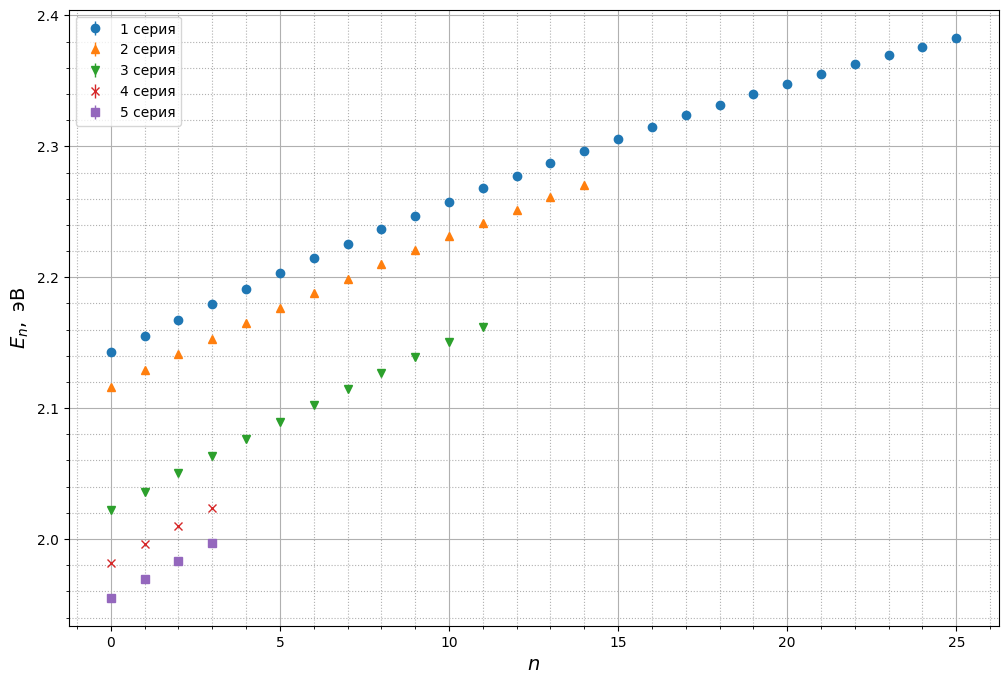

In [44]:
for i, s in enumerate(series):
    print(i)
    plt.errorbar(
        s.n, s.E,
        yerr=s.dE,
        label=f'{i+1} серия',
        lw=0,
        marker=markers[i],
        elinewidth=1
    )

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$E_n,\ \text{эВ}$", fontsize=14)
plt.legend()

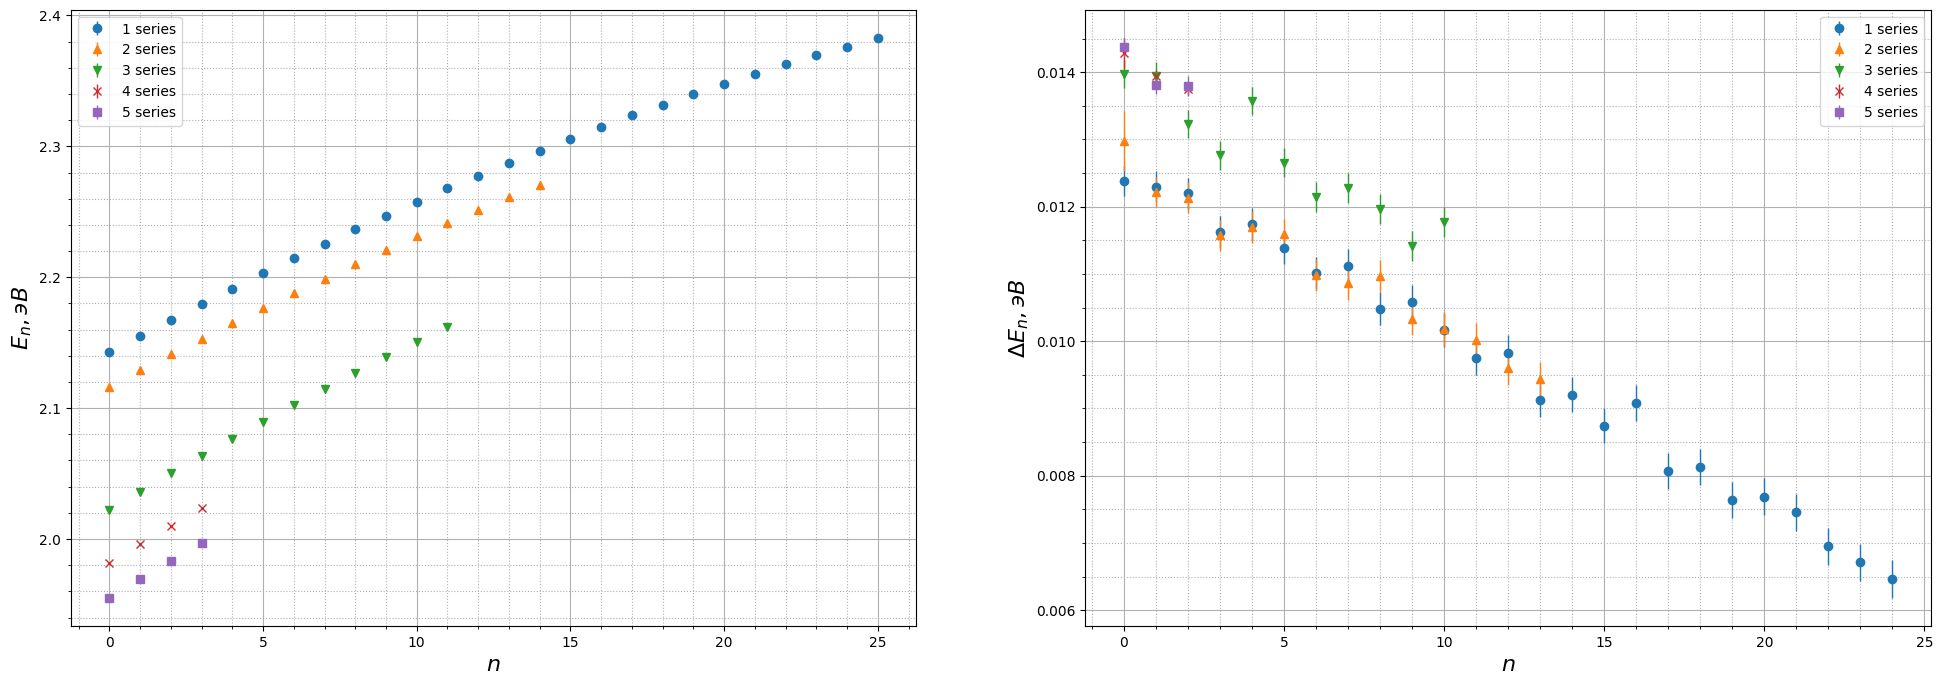

In [45]:
plt.figure(figsize=(24,8))
for i, s in enumerate(series):
    plt.subplot(122)
    plt.errorbar(s.n, s.delta_E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    plt.subplot(121)
    plt.errorbar(s.n, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    
plt.subplot(121)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$E_n, эВ$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

plt.subplot(122)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$\Delta E_n, эВ$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

k = -0.000256 ± 0.000003
b = 0.013194 ± 0.000030


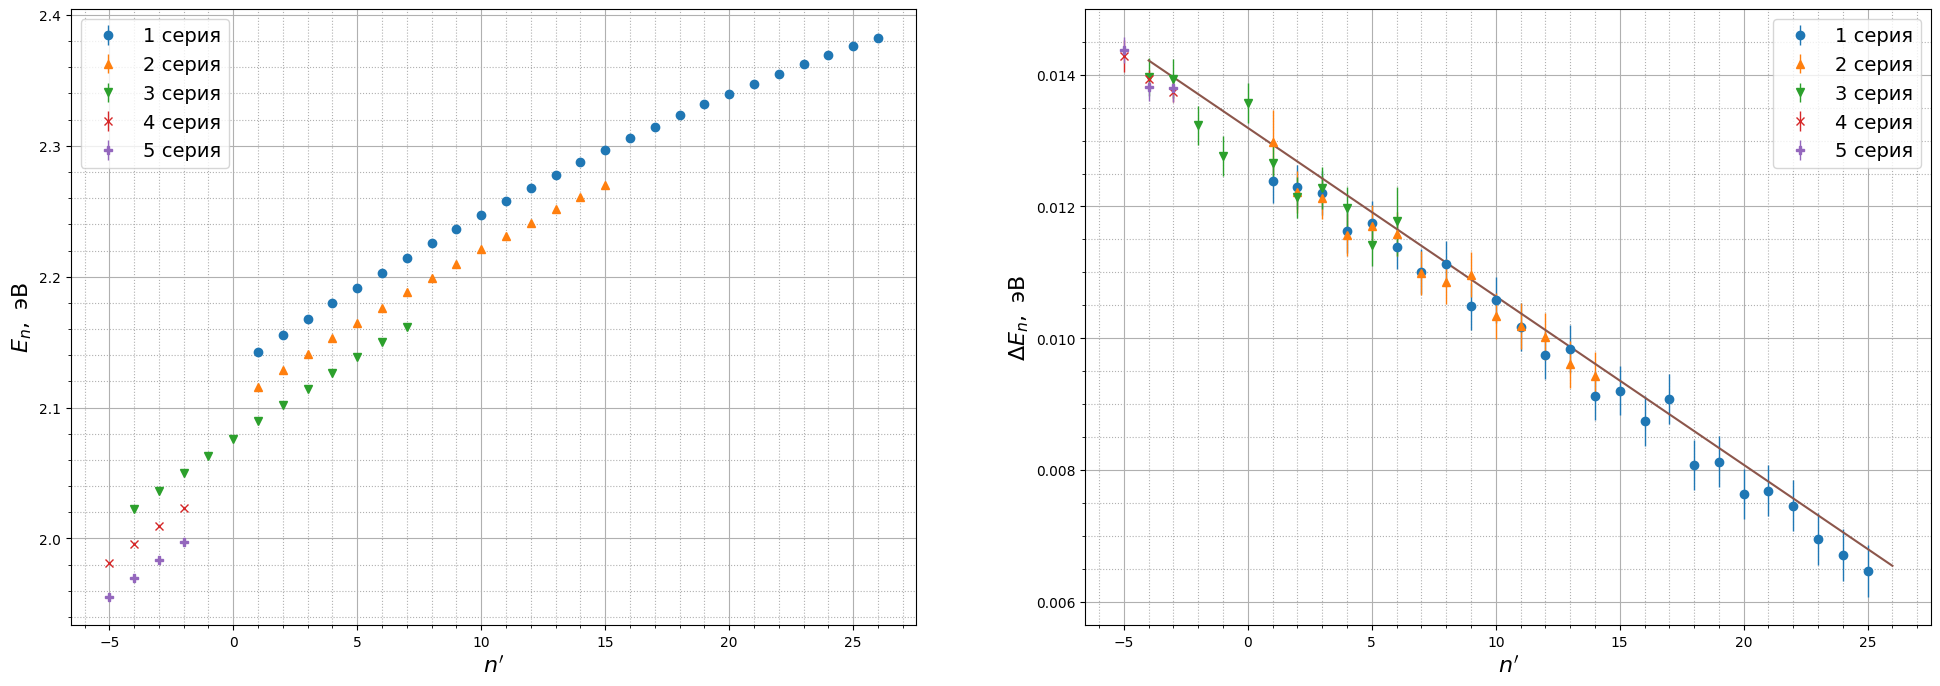

In [46]:
# ================================
# Обработка ΔE(n') и построение графиков
# ================================
delta_n = np.array([12, 12, 6, 5, 5, 0])
delta_n = np.array([1, 1, -4, -5, -5])
for i in range(len(series)):
    series[i]['n_prime'] = series[i]['n'] + delta_n[i]

markers = ['o', '^', 'v', 'x', 'P', 'o']

all_delta_E = []
all_delta_dE = []
all_n_prime = []

plt.figure(figsize=(24,8))

for i, s in enumerate(series):
    mask = s.delta_E.notna()

    # ΔE(n')
    plt.subplot(122)
    plt.errorbar(
        s.n_prime[mask],
        s.delta_E[mask],
        yerr=s.dDelta_E[mask],
        label=f'{i+1} серия',
        lw=0,
        marker=markers[i],
        elinewidth=1
    )

    all_delta_E.extend(s.delta_E[mask].to_numpy())
    all_delta_dE.extend(s.dDelta_E[mask].to_numpy())
    all_n_prime.extend(s.n_prime[mask].to_numpy())

    # E(n')
    plt.subplot(121)
    plt.errorbar(
        s.n_prime,
        s.E,
        yerr=s.dE,
        label=f'{i+1} серия',
        lw=0,
        marker=markers[i],
        elinewidth=1
    )

all_delta_E = np.array(all_delta_E)
all_delta_dE = np.array(all_delta_dE)
all_n_prime = np.array(all_n_prime)

# Линейная аппроксимация ΔE(n')
(k, b), cov = np.polyfit(
    all_n_prime + 1,
    all_delta_E,
    w=1/all_delta_dE,
    deg=1,
    cov=True
)

# Ошибки коэффициентов
dk, db = np.sqrt(np.diag(cov))

# Графики
plt.subplot(121)
plt.xlabel(r"$n'$", fontsize=16)
plt.ylabel(r"$E_n,\ \text{эВ}$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=14)

plt.subplot(122)
n_fit = np.linspace(all_n_prime.min()+1, all_n_prime.max()+1, 200)
plt.plot(n_fit, k*n_fit + b)
plt.xlabel(r"$n'$", fontsize=16)
plt.ylabel(r"$\Delta E_n,\ \text{эВ}$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=14)

print(f"k = {k:.6f} ± {dk:.6f}")
print(f"b = {b:.6f} ± {db:.6f}")


In [47]:
k, b, cov

(np.float64(-0.0002557188275330363),
 np.float64(0.013193785348418202),
 array([[ 9.99431274e-12, -5.10195866e-11],
        [-5.10195866e-11,  9.17373664e-10]]))

In [48]:
# ================================
# Физические параметры из k и b
# ================================
# Колебательная квантовая энергия
hbar_omega = b
dhbar_omega = db

# Ангармоничность Морзе
chi = -k / (2 * b)
dchi = chi * np.sqrt((dk / k)**2 + (db / b)**2)

# Энергия диссоциации из v = 0
D0 = b**2 / (-2 * k)
dD0 = D0 * np.sqrt((2 * db / b)**2 + (dk / k)**2)

# Энергия диссоциации от минимума потенциала
De = D0 + 0.5 * b
dDe = np.sqrt(dD0**2 + (0.5 * db)**2)

# Число колебательных уровней
v_max = 1 / (2 * chi)
dv_max = v_max * (dchi / chi)

# Печать результатов
print(f"hbar*omega = {hbar_omega:.5f} ± {dhbar_omega:.5f} эВ")
print(f"chi        = {chi:.5f} ± {dchi:.5f}")
print(f"D0         = {D0:.3f} ± {dD0:.3f} эВ")
print(f"De         = {De:.3f} ± {dDe:.3f} эВ")
print(f"v_max      = {v_max:.1f} ± {dv_max:.1f}")


hbar*omega = 0.01319 ± 0.00003 эВ
chi        = 0.00969 ± 0.00012
D0         = 0.340 ± 0.004 эВ
De         = 0.347 ± 0.004 эВ
v_max      = 51.6 ± 0.6


In [49]:
# import numpy as np
# from itertools import product

# shift_range = range(-5, 6)

# best_score = np.inf
# best_delta_n = None

# for candidate in product(shift_range, repeat=len(series)):
#     for i, s in enumerate(series):
#         s['n_prime_temp'] = s['n'] + candidate[i]

#     delta_E_means_temp = []
#     for i1, i2 in zip(range(len(series)-1), range(1,len(series))):
#         mask1 = series[i1].n_prime_temp.isin(series[i2].n_prime_temp)
#         mask2 = series[i2].n_prime_temp.isin(series[i1].n_prime_temp)
#         if mask1.sum() == 0 or mask2.sum() == 0:
#             delta_E_means_temp.append(np.nan)
#             continue
#         delta_E = series[i1].E[mask1].values - series[i2].E[mask2].values
#         delta_E_means_temp.append(delta_E.mean())

#     delta_E_means_temp = np.array(delta_E_means_temp)
#     if np.isnan(delta_E_means_temp).any():
#         continue

#     # оценка: стандартное отклонение ΔE (чем меньше, тем лучше)
#     score = np.std(delta_E_means_temp)

#     if score < best_score:
#         best_score = score
#         best_delta_n = candidate

# print(f"Лучшие сдвиги: {best_delta_n}, std(ΔE) = {best_score:.6f} эВ")


Усреднённые значения ΔE между сериями:
ΔE_1 = 2.650785e-02 ± 3.576322e-04 эВ
ΔE_2 = 2.625550e-02 ± 3.843004e-04 эВ
ΔE_3 = 2.643842e-02 ± 2.315743e-04 эВ
ΔE_4 = 2.632248e-02 ± 2.025030e-04 эВ

Среднее всех средних ΔE: 2.638106e-02 ± 9.818816e-05 эВ


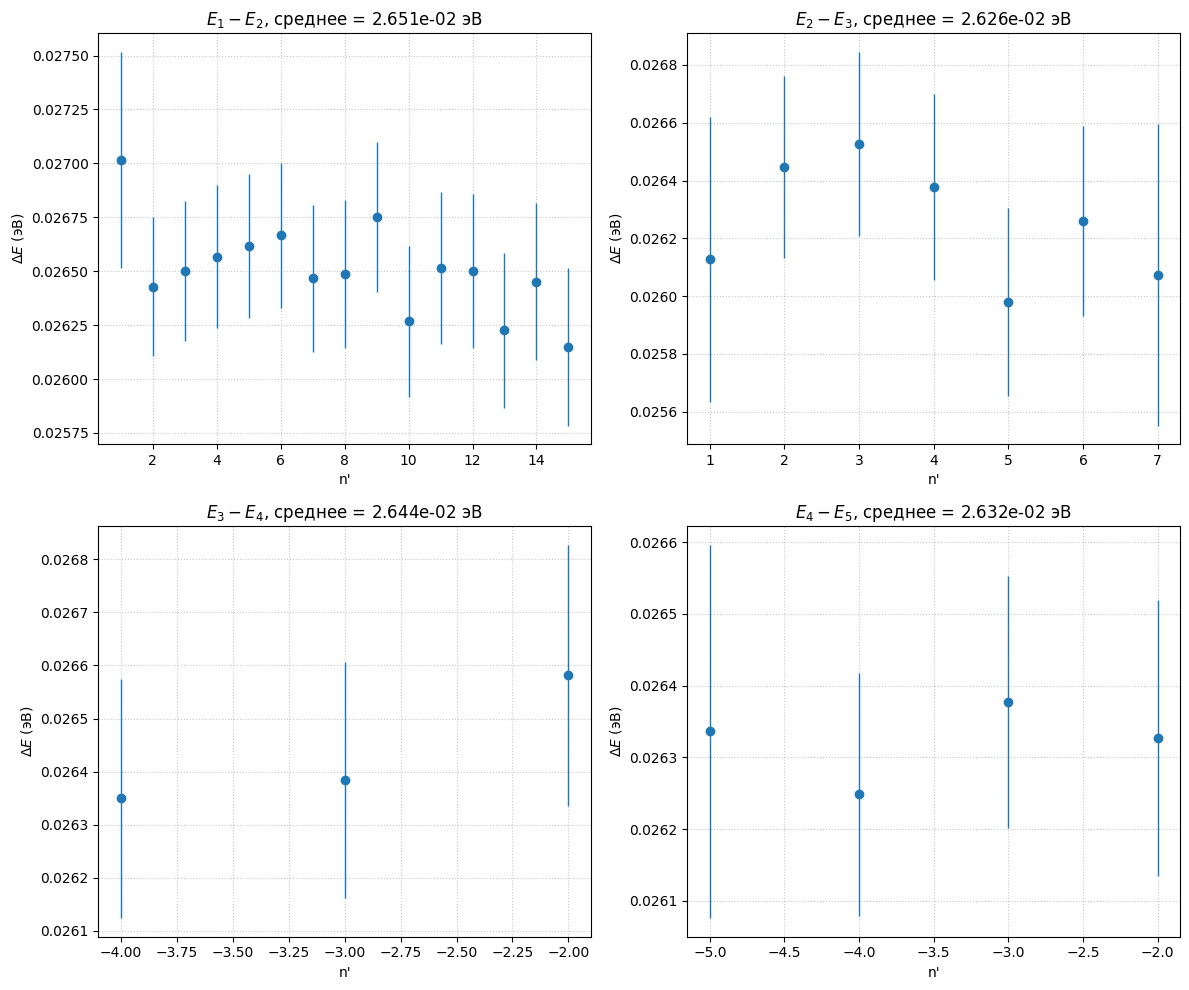

In [50]:
import numpy as np
import matplotlib.pyplot as plt

delta_E_means = []
delta_E_means_err = []

plt.figure(figsize=(12,10))

# перебираем пары соседних серий
for k, (i1, i2) in enumerate(zip(range(len(series)-1), range(1, len(series)))):
    # выбираем только общие n_prime
    maski1 = series[i1].n_prime.isin(series[i2].n_prime)
    maski2 = series[i2].n_prime.isin(series[i1].n_prime)
    
    # проверка на пустые пересечения
    if maski1.sum() == 0 or maski2.sum() == 0:
        print(f"Нет общих n' для серий {i1+1} и {i2+1}")
        continue
    
    general_n = series[i1].n_prime[maski1].values
    delta_E_gen_n = series[i1].E[maski1].values - series[i2].E[maski2].values
    E_err = np.sqrt(series[i1].dE[maski1].values**2 + series[i2].dE[maski2].values**2)

    # график ΔE(n)
    plt.subplot(2, 2, k+1)
    plt.errorbar(general_n, delta_E_gen_n, yerr=E_err, lw=0, elinewidth=1, marker='o')
    plt.title(r"$E_{} - E_{}$, среднее = {:.3e} эВ".format(i1+1, i2+1, delta_E_gen_n.mean()))
    plt.xlabel("n'")
    plt.ylabel(r"$\Delta E$ (эВ)")
    plt.grid(True, which='both', linestyle=':', alpha=0.7)

    # усреднённые значения
    mean_val = delta_E_gen_n.mean()
    mean_err = np.sqrt(np.sum(E_err**2) / len(E_err))
    delta_E_means.append(mean_val)
    delta_E_means_err.append(mean_err)

# преобразуем списки в массивы
delta_E_means = np.array(delta_E_means)
delta_E_means_err = np.array(delta_E_means_err)

# вывод в консоль
print("Усреднённые значения ΔE между сериями:")
for i, (mean, err) in enumerate(zip(delta_E_means, delta_E_means_err)):
    print(f"ΔE_{i+1} = {mean:.6e} ± {err:.6e} эВ")

# среднее всех средних
mean_of_means = delta_E_means.mean()
std_of_means = delta_E_means.std()
print(f"\nСреднее всех средних ΔE: {mean_of_means:.6e} ± {std_of_means:.6e} эВ")

plt.tight_layout()
plt.show()


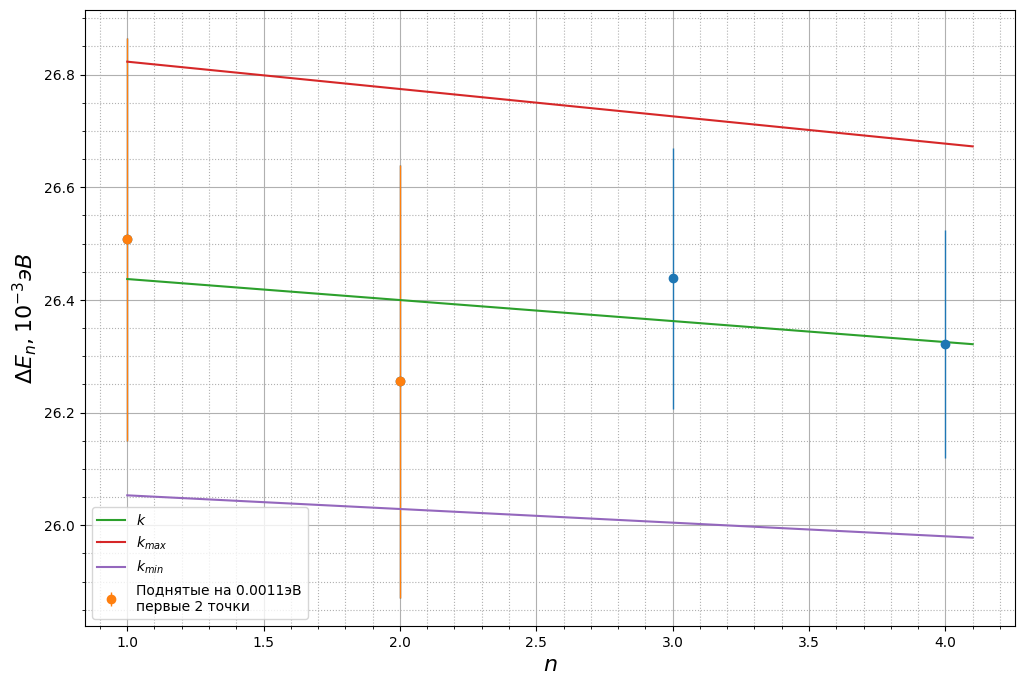

In [51]:
delta_E_means = np.array(delta_E_means) 
delta_E_means_err = np.array(delta_E_means_err) 

plt.errorbar(range(1, 5), delta_E_means*1e3, yerr=delta_E_means_err*1e3, lw=0, elinewidth=1, marker='o')

# delta_E_means[:2] += 0.0011

plt.errorbar(range(1, 3), delta_E_means[:2]*1e3, yerr=delta_E_means_err[:2]*1e3, lw=0, elinewidth=1, marker='o', label="Поднятые на 0.0011эВ\nпервые 2 точки")

(k, b), cov = np.polyfit(range(1, 5), delta_E_means, cov=True, deg=1)
cov = np.sqrt(cov.diagonal())

var_n = np.linspace(1, 4.1, 10)
plt.plot(var_n, (k*var_n + b)*1e3, label=r'$k$')
plt.plot(var_n, (1.3*k*var_n + 1.015*b)*1e3, label=r'$k_{max}$')
plt.plot(var_n, (0.65*k*var_n + 0.985*b)*1e3, label=r'$k_{min}$')

# plt.plot(var_n, (-1.5*k)*var_n + b-1.5e-4, label=r'$k_{max}$')
# plt.plot(var_n, (-0.5*k)*var_n + b-1e-4, label=r'$k$')

plt.ylabel(r"$\Delta E_n, 10^{-3} эВ$", fontsize=16)
plt.xlabel(r"$n$", fontsize=16)

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

In [52]:
np.mean(delta_E_means), np.std(delta_E_means)

(np.float64(0.026381062372012928), np.float64(9.818816314241124e-05))

In [53]:
print(k, b)
print(cov/np.array(k, b))

-3.7320563529626956e-05 0.026474363780836997
[-1.50623308 -4.12498918]


In [54]:
# alpha_gr = 
f"{np.sqrt(-k*1.6e-19*(126.9/2*1.67e-27)/(1.054571817e-34)**2):2e} m^-1"

'7.542789e+09 m^-1'

In [55]:
0.000488, 4.8e-4

(0.000488, 0.00048)

In [56]:
126.9/2

63.45

In [57]:
first_diff = {}
first_diff_err = {}
for i, s in enumerate(series):
    for k in s.n_prime.values[:-1]:
        first_diff.setdefault(k, []) 
        first_diff_err.setdefault(k, []) 
        assert s[s.n_prime==k].delta_E.iloc[0] != None
        first_diff[k].extend(s[s.n_prime==k].delta_E.to_list())
        first_diff_err[k].extend(s[s.n_prime==k].dE.dropna().to_list())

for k, v in first_diff.items():
    first_diff[k] = np.mean(v)
    first_diff_err[k] = np.mean(v)

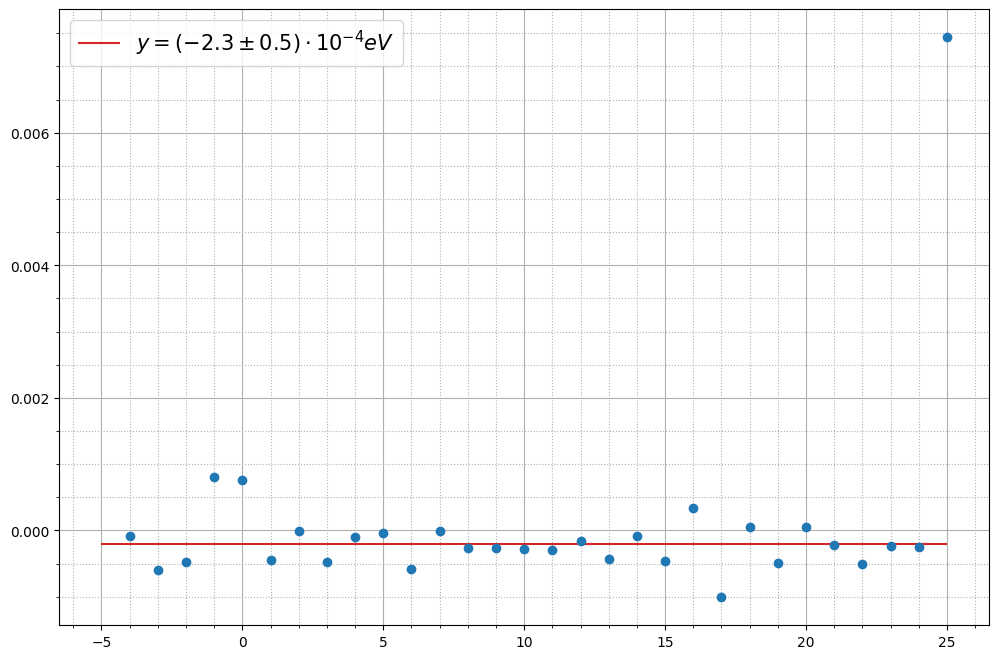

In [58]:
tmp_n = np.array(list(first_diff.keys()))
tmp_delta_E = np.array(list(first_diff.values()))
tmp_delta_E_err = np.array(list(first_diff_err.values()))
second_diff_vals = tmp_delta_E[1:]-tmp_delta_E[:-1]
# second_diff_vals_err = tmp_delta_E_err[1:]

plt.errorbar(tmp_n[:-1], second_diff_vals, lw=0, elinewidth=1, marker='o')
plt.hlines(second_diff_vals[second_diff_vals<0.001].mean(), tmp_n.min(), tmp_n.max(), color='tab:red',
 label=r'$y = (-2.3 \pm 0.5) \cdot 10^{-4} eV$')

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=15)

In [59]:
sec_delta, sig_sec_del = np.polyfit(range(second_diff_vals[second_diff_vals<0.001].shape[0]),
 second_diff_vals[second_diff_vals<0.001], deg=0, cov=True)
sig_sec_del = np.sqrt(sig_sec_del)[0][0]
sec_delta[0], sig_sec_del

(np.float64(-0.00019923776431789595), np.float64(7.010541822109161e-05))

In [60]:
# alpha_gr = 
f"{np.sqrt(0.000243*1.6e-19*(126.9/2*1.67e-27)/(1.054571817e-34)**2):2e} m^-1"

'1.924691e+10 m^-1'

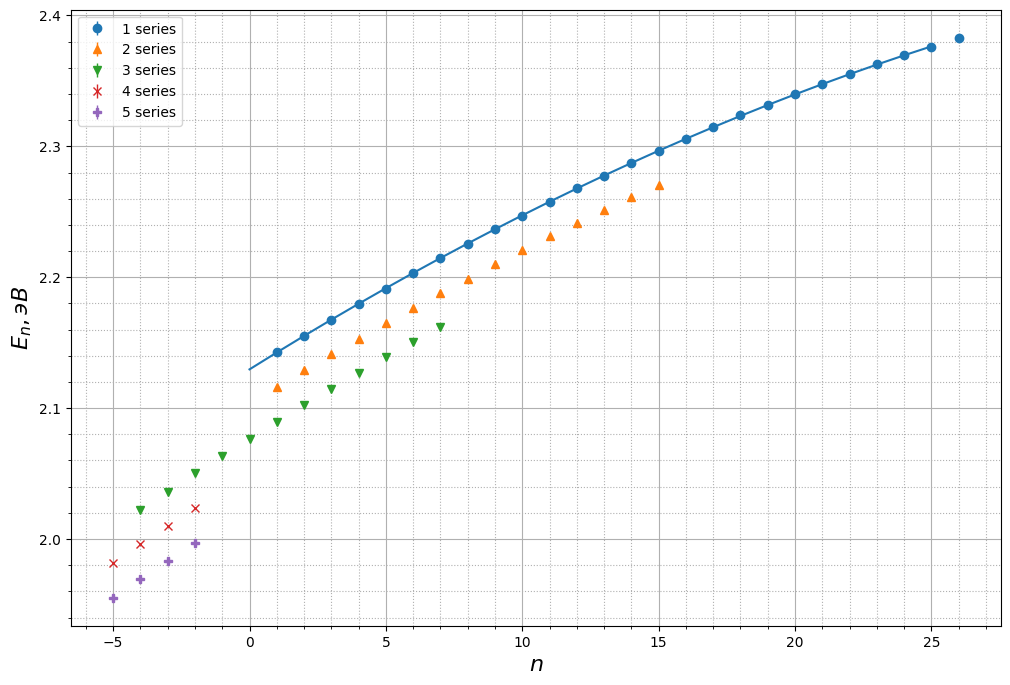

In [61]:
markers = ['o', '^', 'v', 'x', 'P', 'o']

plt.figure(figsize=(12,8))
for i, s in enumerate(series):
    plt.errorbar(s.n_prime.dropna().values, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    if i == 0:
        w, cov = np.polyfit(s.n_prime.dropna().values+0.5, s.E.dropna(), deg=2, cov=True)
        cov = np.sqrt(cov.diagonal())
        
        tmp_x = np.arange(0, s.n_prime.dropna().values.max()) + 0.5
        plt.plot(tmp_x-0.5, w[0]*tmp_x**2 + w[1]*tmp_x + w[2], c='tab:blue')

plt.grid(True)
plt.minorticks_on()
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$E_n, эВ$", fontsize=16)
plt.grid(True, which='minor', linestyle=':')
plt.legend()

In [62]:
w, cov/w

(array([-1.26498620e-04,  1.31593536e-02,  2.12305150e+00]),
 array([-5.22005788e-03,  1.44461267e-03,  5.46126704e-05]))

In [63]:
w[-1], cov[-1]

(np.float64(2.1230514998482564), np.float64(0.00011594551190911142))

In [64]:
1.98+0.02675/2  

1.993375

In [65]:
1.98 \pm 0.02 eV


SyntaxError: unexpected character after line continuation character (2101456170.py, line 1)

In [ ]:
# N_ex
0.01533/0.000242 - 0.5

In [ ]:
# N_gr
0.02675/0.000488150 - 0.5

In [ ]:
# \delta E_dis_gr
(1/2)*1/0.000488150 * (0.02675)**2

In [ ]:
# \delta E_dis_ex
(1/2)*1/0.000243 * (0.01533)**2

In [ ]:
2/127*1.3e-3

In [ ]:
(26.8e-3*1.6e-19/1.0545718e-34)**2*(63.5*1.67e-27) #/1.380650e-23

In [ ]:
(1+160/4)/(1+0.75*160)